In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product

Read in data

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),name,cumulative production
0,66100.0,22300.0,0.09,0.033,0.332,9440769.483,0.124740,0.875260,260036.414279,275.737593,Tarragon 4-119H,81324.0
1,66199.0,22300.0,0.12,0.057,0.332,9429043.880,0.124979,0.875021,NaN,NaN,Tarragon 4-119H,81324.0
2,66297.0,22300.0,0.11,0.050,0.332,9417413.010,0.125221,0.874779,429740.754787,324.145032,Tarragon 4-119H,81324.0
3,66396.0,22300.0,0.08,0.024,0.332,9405879.454,0.125469,0.874531,NaN,NaN,Tarragon 4-119H,81324.0
4,66495.0,22300.0,0.08,0.031,0.332,9394445.773,0.125720,0.874280,485657.822229,320.868488,Tarragon 4-119H,81324.0


Build testing and training datasets in such a way that NaN values can be removed while keeping the predictor and target columns in sync

In [3]:
def train_test_data(feature, test_size=0.8, random_state=0):
    total_data = data[['easting', 'northing'] + [feature]].dropna()
    x = total_data[['easting', 'northing']]
    y = total_data[feature]
    
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

Method for plotting model

In [62]:
def predict_and_plot(model, precision=2000):
    valid_data = data[['easting', 'northing']].dropna()
    easting = valid_data['easting']
    northing = valid_data['northing']
    grid = np.mgrid[easting.min():easting.max():precision, northing.min():northing.max():precision]
    grid = grid.reshape((2, -1))

    input_array = []

    for i in range(len(grid[0])):
        input_array.append((grid[0][i], grid[1][i]))

    predictions = model.predict(input_array)
    print(len(predictions), grid.shape)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.scatter(grid[0], grid[1], c=predictions)
    plt.colorbar()

Get the testing and training datasets

In [5]:
train_x, test_x, train_y, test_y = train_test_data('porosity')

Build regressor

In [47]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = RBF(1e2)
gp = GaussianProcessRegressor(kernel=kernel)

gp.fit(train_x, train_y)

GaussianProcessRegressor(kernel=RBF(length_scale=100))

Plot model

2400 (2, 2400)


TypeError: Invalid shape (2400,) for image data

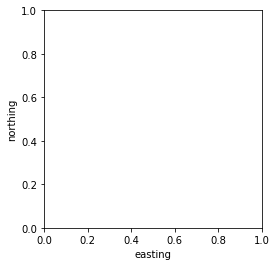

In [61]:
predict_and_plot(gp)

In [49]:
gp.score(test_x, test_y)

-8.724998139962002